# DS53 — Sectoral Dominance Analysis

**Member Assigned:** DE LA ROSA, Nathaniel
**Task Name:** Sectoral Dominance Analysis

## Task Description
Determine which economic sectors dominate regional economies by calculating sectoral shares of total GRDP. Analyze how agriculture, industry, and services contribute to regional output and identify dominant sector patterns.

## Expected Outputs
- Sector share table per region
- Identification of dominant sector per region
- Comparative visualization of sector shares
- Interpretation explaining sector specialization

## Dataset: SECTORAL ECONOMIC STRUCTURE (Sector Level)

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Robust BASE_DIR resolution for notebook and script contexts.
try:
    BASE_DIR = Path(__file__).resolve().parents[2]
except NameError:
    cwd = Path.cwd().resolve()
    if (cwd / "03_Cleaned_Data").exists():
        BASE_DIR = cwd
    elif (cwd.parent / "03_Cleaned_Data").exists():
        BASE_DIR = cwd.parent
    elif len(cwd.parents) > 1 and (cwd.parents[1] / "03_Cleaned_Data").exists():
        BASE_DIR = cwd.parents[1]
    else:
        BASE_DIR = cwd.parents[1] if len(cwd.parents) > 1 else cwd

CLEAN_DIR = BASE_DIR / "03_Cleaned_Data"
OUT_TABLES = BASE_DIR / "outputs" / "tables"
OUT_FIGS = BASE_DIR / "outputs" / "figures"

OUT_TABLES.mkdir(parents=True, exist_ok=True)
OUT_FIGS.mkdir(parents=True, exist_ok=True)

print(f"BASE_DIR: {BASE_DIR}")
print(f"CLEAN_DIR exists: {CLEAN_DIR.exists()}")
print(f"OUT_TABLES: {OUT_TABLES}")
print(f"OUT_FIGS: {OUT_FIGS}")

BASE_DIR: C:\Users\natdl\PycharmProjects\9345-Prelim-Summative-Activity-TeamWPS
CLEAN_DIR exists: True
OUT_TABLES: C:\Users\natdl\PycharmProjects\9345-Prelim-Summative-Activity-TeamWPS\outputs\tables
OUT_FIGS: C:\Users\natdl\PycharmProjects\9345-Prelim-Summative-Activity-TeamWPS\outputs\figures


In [51]:
# ==========================================================
# VALIDATION
# ==========================================================
df2 = pd.read_csv(CLEAN_DIR / "Dataset 2 Sector_Economic_Structure (CLEANED).csv")

print("Shape:", df2.shape)
print("Unique Main Sectors:", df2["Main_Sector"].nunique())
print("Year range:", df2["Year"].min(), "-", df2["Year"].max())
print("Price Types:", df2["Price_Type"].unique())

display(df2.head())

Shape: (150, 4)
Unique Main Sectors: 3
Year range: 2000 - 2024
Price Types: <StringArray>
['At Constant 2018 Prices', 'At Current Prices']
Length: 2, dtype: str


,Main_Sector,Year,Price_Type,Total_GRDP
0,"Agriculture, forestry, and fishing",2000,At Constant 2018 Prices,1.045260e+09
1,"Agriculture, forestry, and fishing",2000,At Current Prices,5.051345e+08
2,"Agriculture, forestry, and fishing",2001,At Constant 2018 Prices,1.084420e+09
3,"Agriculture, forestry, and fishing",2001,At Current Prices,5.253688e+08
4,"Agriculture, forestry, and fishing",2002,At Constant 2018 Prices,1.125200e+09


In [52]:
# ==========================================================
# FILTER BY PRICE TYPE
# ==========================================================

df2_constant = df2[df2["Price_Type"] == "At Constant 2018 Prices"].copy()
df2_current = df2[df2["Price_Type"] == "At Current Prices"].copy()

print("Constant Prices Shape:", df2_constant.shape)
print("Current Prices Shape:", df2_current.shape)


Constant Prices Shape: (75, 4)
Current Prices Shape: (75, 4)


In [53]:
# ==========================================================
# CONSTANT PRICES: AVERAGE GRDP PER SECTOR
# ==========================================================

sector_avg_constant = (
    df2_constant.groupby("Main_Sector", as_index=False)["Total_GRDP"]
    .mean()
    .rename(columns={
        "Main_Sector": "Sector",
        "Total_GRDP": "Average_GRDP"
    })
    .sort_values(by="Average_GRDP", ascending=False)
)

display(sector_avg_constant)


,Sector,Average_GRDP
2,Services,9.751614e+09
1,Industry,4.400322e+09
0,"Agriculture, forestry, and fishing",1.642576e+09


In [54]:
# ==========================================================
# CONSTANT PRICES: SECTOR SHARE + RANKING
# ==========================================================

total_avg_constant = sector_avg_constant["Average_GRDP"].sum()

sector_avg_constant["Sector_Share"] = (sector_avg_constant["Average_GRDP"] / total_avg_constant) * 100
sector_avg_constant["Rank"] = range(1, len(sector_avg_constant) + 1)

sector_ranking_constant = sector_avg_constant[["Rank", "Sector", "Average_GRDP", "Sector_Share"]]

display(sector_ranking_constant)


,Rank,Sector,Average_GRDP,Sector_Share
2,1,Services,9.751614e+09,61.740521
1,2,Industry,4.400322e+09,27.859817
0,3,"Agriculture, forestry, and fishing",1.642576e+09,10.399662


In [55]:
# ==========================================================
# EXPORT CONSTANT PRICES TABLE
# ==========================================================

sector_ranking_constant.to_csv(
    OUT_TABLES / "DS53_sector_ranking_constant_prices.csv",
    index=False
)

print("Saved table:", OUT_TABLES / "DS53_sector_ranking_constant_prices.csv")


Saved table: C:\Users\natdl\PycharmProjects\9345-Prelim-Summative-Activity-TeamWPS\outputs\tables\DS53_sector_ranking_constant_prices.csv


In [56]:
# ==========================================================
# CURRENT PRICES: AVERAGE GRDP PER SECTOR
# ==========================================================

sector_avg_current = (
    df2_current.groupby("Main_Sector", as_index=False)["Total_GRDP"]
    .mean()
    .rename(columns={
        "Main_Sector": "Sector",
        "Total_GRDP": "Average_GRDP"
    })
    .sort_values(by="Average_GRDP", ascending=False)
)

display(sector_avg_current)


,Sector,Average_GRDP
2,Services,9.222476e+09
1,Industry,4.186126e+09
0,"Agriculture, forestry, and fishing",1.507505e+09


In [57]:
# ==========================================================
# CURRENT PRICES: SECTOR SHARE + RANKING
# ==========================================================

total_avg_current = sector_avg_current["Average_GRDP"].sum()

sector_avg_current["Sector_Share"] = (sector_avg_current["Average_GRDP"] / total_avg_current) * 100
sector_avg_current["Rank"] = range(1, len(sector_avg_current) + 1)

sector_ranking_current = sector_avg_current[["Rank", "Sector", "Average_GRDP", "Sector_Share"]]

display(sector_ranking_current)


,Rank,Sector,Average_GRDP,Sector_Share
2,1,Services,9.222476e+09,61.828972
1,2,Industry,4.186126e+09,28.064467
0,3,"Agriculture, forestry, and fishing",1.507505e+09,10.106561


In [58]:
# ==========================================================
# EXPORT CURRENT PRICES TABLE
# ==========================================================

sector_ranking_current.to_csv(
    OUT_TABLES / "DS53_sector_ranking_current_prices.csv",
    index=False
)

print("Saved table:", OUT_TABLES / "DS53_sector_ranking_current_prices.csv")


Saved table: C:\Users\natdl\PycharmProjects\9345-Prelim-Summative-Activity-TeamWPS\outputs\tables\DS53_sector_ranking_current_prices.csv


In [59]:
# ==========================================================
# PREPARE COMPARISON DATASET FOR VISUALIZATIONS
# ==========================================================

share_constant = sector_ranking_constant[["Sector", "Sector_Share"]].copy()
share_current = sector_ranking_current[["Sector", "Sector_Share"]].copy()

share_compare = pd.merge(
    share_constant,
    share_current,
    on="Sector",
    suffixes=("_Constant", "_Current")
)

# Sort by constant sector share
share_compare = share_compare.sort_values(by="Sector_Share_Constant", ascending=False)

display(share_compare)


,Sector,Sector_Share_Constant,Sector_Share_Current
0,Services,61.740521,61.828972
1,Industry,27.859817,28.064467
2,"Agriculture, forestry, and fishing",10.399662,10.106561


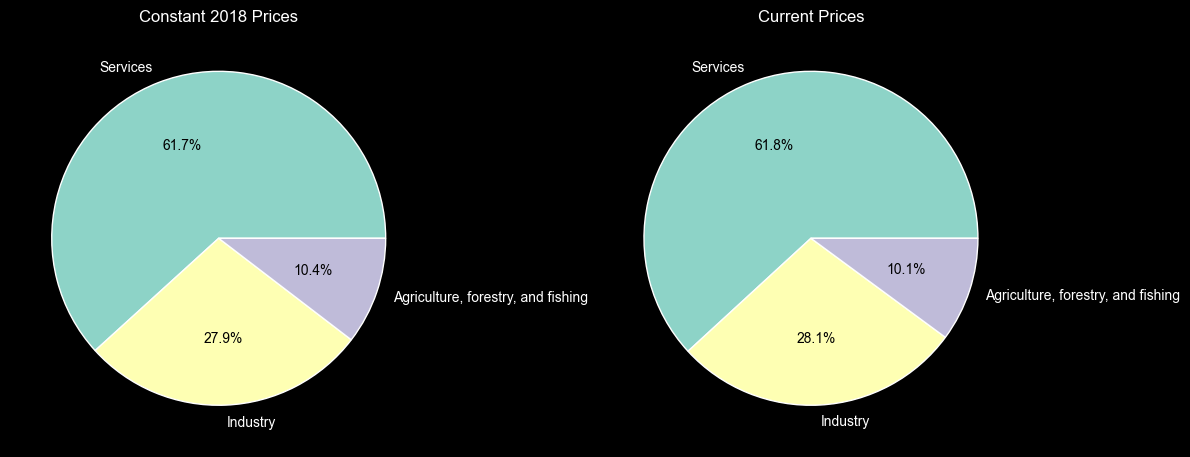

Saved figure: C:\Users\natdl\PycharmProjects\9345-Prelim-Summative-Activity-TeamWPS\outputs\figures\DS53_sector_share_comparison_pie.png


In [60]:
# ==========================================================
# VISUALIZATION: PIE CHARTS (CONSTANT VS CURRENT)
# ==========================================================

fig, axes = plt.subplots(1, 2, figsize=(12,6))

# Constant Prices Pie
wedges, texts, autotexts = axes[0].pie(
    share_compare["Sector_Share_Constant"],
    labels=share_compare["Sector"],
    autopct="%1.1f%%"
)
for autotext in autotexts:
    autotext.set_color('black')
axes[0].set_title("Constant 2018 Prices")

# Current Prices Pie
wedges, texts, autotexts = axes[1].pie(
    share_compare["Sector_Share_Current"],
    labels=share_compare["Sector"],
    autopct="%1.1f%%"
)
for autotext in autotexts:
    autotext.set_color('black')
axes[1].set_title("Current Prices")

plt.tight_layout()
plt.savefig(OUT_FIGS / "DS53_sector_share_comparison_pie.png", dpi=300)
plt.show()

print("Saved figure:", OUT_FIGS / "DS53_sector_share_comparison_pie.png")


In [61]:
# ==========================================================
# SUMMARY OUTPUTS (FOR REPORT WRITING)
# ==========================================================

print("Top Sectors (Constant Prices):")
display(sector_ranking_constant)

print("\nTop Sectors (Current Prices):")
display(sector_ranking_current)


Top Sectors (Constant Prices):


,Rank,Sector,Average_GRDP,Sector_Share
2,1,Services,9.751614e+09,61.740521
1,2,Industry,4.400322e+09,27.859817
0,3,"Agriculture, forestry, and fishing",1.642576e+09,10.399662



Top Sectors (Current Prices):


,Rank,Sector,Average_GRDP,Sector_Share
2,1,Services,9.222476e+09,61.828972
1,2,Industry,4.186126e+09,28.064467
0,3,"Agriculture, forestry, and fishing",1.507505e+09,10.106561
